In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data = pd.read_csv('final_data.csv')
data.head()

,# Label,Subject,Ac_X,Ac_Y,Ac_Z,Gy_X,Gy_Y,Gy_Z
0,1.0,150.0,-0.258182,-10.166052,2.550443,0.093337,-0.392480,0.263686
1,1.0,150.0,-0.388135,-9.908323,1.963548,0.124267,-0.363047,0.274406
2,1.0,150.0,-0.524603,-9.649285,1.348127,0.130253,-0.308955,0.277545
3,1.0,150.0,-0.643571,-9.431819,0.739273,0.109381,-0.234033,0.271940
4,1.0,150.0,-0.724712,-9.287633,0.173690,0.061910,-0.145865,0.257011


In [4]:
final_data = data.rename(columns = {'# Label':'act',' Subject':'subject',' Ac_X':'ax',' Ac_Y':'ay',' Ac_Z':'az',' Gy_X':'gx',' Gy_Y':'gy',' Gy_Z':'gz'}).copy()

In [5]:
final_data.head()

,act,subject,ax,ay,az,gx,gy,gz
0,1.0,150.0,-0.258182,-10.166052,2.550443,0.093337,-0.392480,0.263686
1,1.0,150.0,-0.388135,-9.908323,1.963548,0.124267,-0.363047,0.274406
2,1.0,150.0,-0.524603,-9.649285,1.348127,0.130253,-0.308955,0.277545
3,1.0,150.0,-0.643571,-9.431819,0.739273,0.109381,-0.234033,0.271940
4,1.0,150.0,-0.724712,-9.287633,0.173690,0.061910,-0.145865,0.257011


In [6]:
label = LabelEncoder()                       ###labelling the float type label to integers

final_data['label'] = label.fit_transform(final_data['act'])
final_data.head()

,act,subject,ax,ay,az,gx,gy,gz,label
0,1.0,150.0,-0.258182,-10.166052,2.550443,0.093337,-0.392480,0.263686,0
1,1.0,150.0,-0.388135,-9.908323,1.963548,0.124267,-0.363047,0.274406,0
2,1.0,150.0,-0.524603,-9.649285,1.348127,0.130253,-0.308955,0.277545,0
3,1.0,150.0,-0.643571,-9.431819,0.739273,0.109381,-0.234033,0.271940,0
4,1.0,150.0,-0.724712,-9.287633,0.173690,0.061910,-0.145865,0.257011,0


In [7]:
final_data['label'].value_counts()

0    78119
2    41001
1    38769
Name: label, dtype: int64

In [8]:
label.classes_   # 1.0 == Normal Walking, 2.0 == Upstairs, 3.0 == Downstairs

array([1., 2., 3.])

In [9]:
final_data['ax'] = final_data['ax'].astype(float)         # convert the data to float
final_data['ay'] = final_data['ay'].astype(float)
final_data['az'] = final_data['az'].astype(float)
final_data['gx'] = final_data['gx'].astype(float)
final_data['gy'] = final_data['gy'].astype(float)
final_data['gz'] = final_data['gz'].astype(float)

In [10]:
normal = final_data[final_data['act']== 1.0].head(38769).copy()                # Balancing the Dataset  
downstairs = final_data[final_data['act']== 3.0].head(38769).copy()
upstairs = final_data[final_data['act']== 2.0].head(38769).copy()

In [11]:
bal_data = pd.DataFrame()                            
bal_data = bal_data.append([normal, upstairs, downstairs])
bal_data.shape
#bal_data.head(100)

(116307, 9)

In [12]:
bal_data['act'].value_counts()

1.0    38769
2.0    38769
3.0    38769
Name: act, dtype: int64

In [13]:
balanced_data = bal_data.drop(['act','subject'],axis = 1).copy()   # dropping the unwanted act and subject column
balanced_data.head()

,ax,ay,az,gx,gy,gz,label
0,-0.258182,-10.166052,2.550443,0.093337,-0.392480,0.263686,0
1,-0.388135,-9.908323,1.963548,0.124267,-0.363047,0.274406,0
2,-0.524603,-9.649285,1.348127,0.130253,-0.308955,0.277545,0
3,-0.643571,-9.431819,0.739273,0.109381,-0.234033,0.271940,0
4,-0.724712,-9.287633,0.173690,0.061910,-0.145865,0.257011,0


In [14]:
x = balanced_data[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]       ### Data Standarisation
y = balanced_data['label']

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

scaled_X = pd.DataFrame(data = X, columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz'])
scaled_X['label'] = y.values

scaled_X

,ax,ay,az,gx,gy,gz,label
0,-0.299364,-0.286948,0.838830,0.083177,-0.473552,0.390582,0
1,-0.351172,-0.202071,0.619887,0.110834,-0.439610,0.406301,0
2,-0.405577,-0.116763,0.390302,0.116186,-0.377233,0.410904,0
3,-0.453006,-0.045146,0.163167,0.097523,-0.290835,0.402686,0
4,-0.485354,0.002338,-0.047826,0.055077,-0.189162,0.380794,0
...,...,...,...,...,...,...,...
116302,1.289980,0.266349,-1.284699,0.407923,0.672592,0.227501,2
116303,1.369501,-0.065428,-1.271893,0.273131,0.627867,-0.076980,2
116304,1.364718,-0.392357,-1.208005,0.151369,0.526308,-0.333906,2
116305,1.291364,-0.705695,-1.098210,0.048201,0.379669,-0.527224,2


In [16]:
import scipy.stats as stats

In [17]:
# Frame Preparation
Fs = 50
frame_size = Fs*4
hop_size = Fs*2

In [18]:
def get_frames(data, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(data) - frame_size, hop_size):
        x1 = data['ax'].values[i: i + frame_size]
        y1 = data['ay'].values[i: i + frame_size]
        z1 = data['az'].values[i: i + frame_size]
        x2 = data['gx'].values[i: i + frame_size]
        y2 = data['gy'].values[i: i + frame_size]
        z2 = data['gz'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(data['label'][i: i + frame_size])[0][0]
        frames.append([x1, y1, z1, x2, y2, z2])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [19]:
X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((1162, 200, 6), (1162,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify = y)
X_train.shape, X_test.shape

((929, 200, 6), (233, 200, 6))

In [25]:
X_train[0].shape, X_test[0].shape

((200, 6), (200, 6))

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train[0].shape))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               360300    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 390,703
Trainable params: 390,703
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [34]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
30/30 [==============================] - 0s 7ms/step - loss: 1.1573 - accuracy: 0.3735 - val_loss: 1.1203 - val_accuracy: 0.4249
Epoch 2/30
30/30 [==============================] - 0s 4ms/step - loss: 0.9057 - accuracy: 0.5759 - val_loss: 1.0153 - val_accuracy: 0.5365
Epoch 3/30
30/30 [==============================] - 0s 4ms/step - loss: 0.7603 - accuracy: 0.7115 - val_loss: 0.9788 - val_accuracy: 0.5408
Epoch 4/30
30/30 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.8073 - val_loss: 0.9627 - val_accuracy: 0.5837
Epoch 5/30
30/30 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.8461 - val_loss: 0.9099 - val_accuracy: 0.6137
Epoch 6/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.8773 - val_loss: 0.9702 - val_accuracy: 0.6009
Epoch 7/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4463 - accuracy: 0.8999 - val_loss: 0.8997 - val_accuracy: 0.6309
Epoch 8/30
30/30 [==

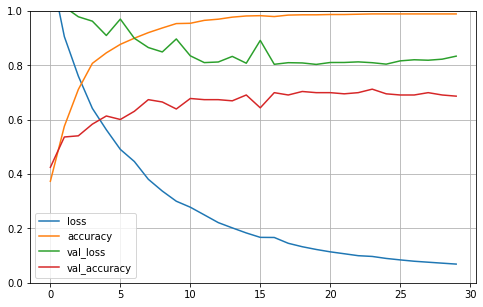

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Validation and Training lines are far apart suggesting overfitting, need for a dropout layer or regularization

# Predicting the values

In [36]:
X_new = X_test[:3]
>>> y_proba = model.predict(X_new)
>>> y_proba.round(2)

array([[0.  , 0.11, 0.89],
       [0.47, 0.06, 0.47],
       [0.11, 0.89, 0.  ]], dtype=float32)

In [37]:
y_new = y_test[:3]
y_new

array([2, 2, 1], dtype=int64)